In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Sun Apr 11 03:43:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import tensorflow as tf

# **Import the libraries**

In [5]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,Input, Lambda

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [6]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.4.1


In [7]:
size = 32
model_name  = 'handwrittern bangla letter32 Dense169.h5'
batch_size = 16
IMAGE_SIZE = [size,size ]
path = '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/'

train_path = path + 'Train'
test_path = path + 'Test'

In [8]:

folders = glob(train_path + '/*')

folders

['/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/177',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/175',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/172',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/176',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/180',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/173',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/181',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/174',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/179',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/178',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/186',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/182',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/191',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/190',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/1

In [9]:
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50,pooling='avg') 
model_d=DenseNet169(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50) 
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(len(folders),activation='softmax')(x) #FC-layer

51879936/51877672 [==============================] - 0s 0us/step


In [10]:
model = Model(inputs=model_d.input, outputs=preds)
# model.summary()

In [11]:
# don't train existing weights
# for layer in model.layers:
#     layer.trainable = False


# for layer in model.layers[:-8]:
#     layer.trainable=False
    
# for layer in model.layers[-8:]:
#     layer.trainable=True

In [12]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint(model_name, verbose=1, save_best_only=True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 12010 images belonging to 50 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (size, size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 3050 images belonging to 50 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  callbacks=[anne, checkpoint],
  validation_steps=len(test_set)
)

Epoch 1/100
751/751 [==============================] - 4250s 6s/step - loss: 4.0379 - accuracy: 0.1127 - val_loss: 22.7720 - val_accuracy: 0.2682

Epoch 00001: val_loss improved from inf to 22.77201, saving model to handwrittern bangla letter32 Dense169.h5
Epoch 2/100
751/751 [==============================] - 69s 92ms/step - loss: 2.5691 - accuracy: 0.3174 - val_loss: 1.4787 - val_accuracy: 0.5492

Epoch 00002: val_loss improved from 22.77201 to 1.47868, saving model to handwrittern bangla letter32 Dense169.h5
Epoch 3/100
751/751 [==============================] - 69s 92ms/step - loss: 1.8051 - accuracy: 0.4896 - val_loss: 4.3039 - val_accuracy: 0.1908

Epoch 00003: val_loss did not improve from 1.47868
Epoch 4/100
751/751 [==============================] - 68s 91ms/step - loss: 1.6912 - accuracy: 0.5136 - val_loss: 0.5847 - val_accuracy: 0.8210

Epoch 00004: val_loss improved from 1.47868 to 0.58471, saving model to handwrittern bangla letter32 Dense169.h5
Epoch 5/100
751/751 [======

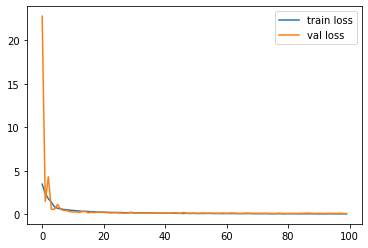

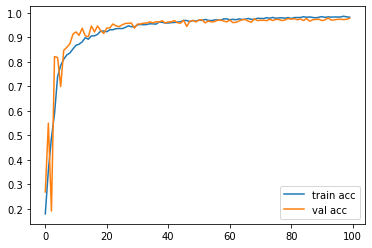

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save(model_name)

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[1.1534627e-12, 1.6362833e-12, 1.6316567e-18, ..., 2.0039435e-17,
        4.4763752e-15, 2.6540018e-11],
       [4.8086417e-08, 1.4150532e-08, 7.4571828e-11, ..., 1.1902439e-06,
        2.0599723e-10, 5.3742184e-08],
       [2.4922554e-07, 3.3421095e-09, 9.7678345e-09, ..., 3.2813638e-09,
        5.0872462e-11, 3.4837457e-09],
       ...,
       [2.9160860e-08, 3.2572933e-09, 6.5242559e-02, ..., 2.5129259e-05,
        6.3891443e-06, 3.8048478e-07],
       [5.5147133e-12, 2.1373099e-11, 4.4320931e-08, ..., 9.0233968e-08,
        2.9625019e-08, 4.9554078e-10],
       [3.0411851e-08, 9.3394903e-10, 1.4372310e-06, ..., 1.2527839e-08,
        5.1074716e-16, 1.8506179e-13]], dtype=float32)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model(model_name)
new_model = tf.keras.models.load_model(model_name)

# Check its architecture
new_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [21]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print('Restored model, loss: {:5.2f}%'.format(100 * loss))


191/191 - 8s - loss: 0.0761 - accuracy: 0.9774
Restored model, accuracy: 97.74%
